# CIFAR10模型训练与测试
$Meringue$
$5/8/2017$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
caffe_root = '/home/vicky/Software/caffe-master'
sys.path.insert(0,caffe_root+'/python')
import caffe

In [3]:
import os
os.chdir(caffe_root)
caffe.set_device(0)
caffe.set_mode_gpu()

# solver = caffe.SGDSolver('/home/vicky/Documents/CaffePy/cifar10py/cifar10_caffemodels/model2/cifar10_quick_solver.prototxt')
solver = caffe.SGDSolver('/home/vicky/Software/caffe-master/examples/cifar10/cifar10_quick_solver.prototxt')

In [4]:
[(k,v.data.shape) for k,v in solver.net.blobs.items()]

[('data', (100, 3, 32, 32)),
 ('label', (100,)),
 ('conv1', (100, 32, 32, 32)),
 ('pool1', (100, 32, 16, 16)),
 ('conv2', (100, 32, 16, 16)),
 ('pool2', (100, 32, 8, 8)),
 ('conv3', (100, 64, 8, 8)),
 ('pool3', (100, 64, 4, 4)),
 ('ip1', (100, 64)),
 ('ip2', (100, 10)),
 ('loss', ())]

### 两种训练方式

#### 1. 一次训练整个模型

In [5]:
%%time
# 一次训练整个模型
solver.solve()


CPU times: user 46 s, sys: 8.77 s, total: 54.7 s
Wall time: 46.5 s


In [6]:
solver.test_nets[0].blobs['accuracy'].data # 准确率

array(0.6000000238418579, dtype=float32)

#### 2. 一步步训练并保存中间结果

In [9]:
%%time
niter = 5000
train_interval = 100
# losses will also be stored in the log
train_loss = np.zeros(niter)
test_accuracy = np.zeros_like(train_loss)


# the main solver loop
for it in range(niter):
    solver.step(1)  # SGD by Caffe(step by step)
    
    # store the train loss
    if (it+1)%train_interval ==0:
        print 'training iteration', it+1
    train_loss[it] = solver.net.blobs['loss'].data
    test_accuracy[it] = solver.test_nets[0].blobs['accuracy'].data  
# '''

training iteration 100
training iteration 200
training iteration 300
training iteration 400
training iteration 500
training iteration 600
training iteration 700
training iteration 800
training iteration 900
training iteration 1000
training iteration 1100
training iteration 1200
training iteration 1300
training iteration 1400
training iteration 1500
training iteration 1600
training iteration 1700
training iteration 1800
training iteration 1900
training iteration 2000
training iteration 2100
training iteration 2200
training iteration 2300
training iteration 2400
training iteration 2500
training iteration 2600
training iteration 2700
training iteration 2800
training iteration 2900
training iteration 3000
training iteration 3100
training iteration 3200
training iteration 3300
training iteration 3400
training iteration 3500
training iteration 3600
training iteration 3700
training iteration 3800
training iteration 3900
training iteration 4000
training iteration 4100
training iteration 4200
t

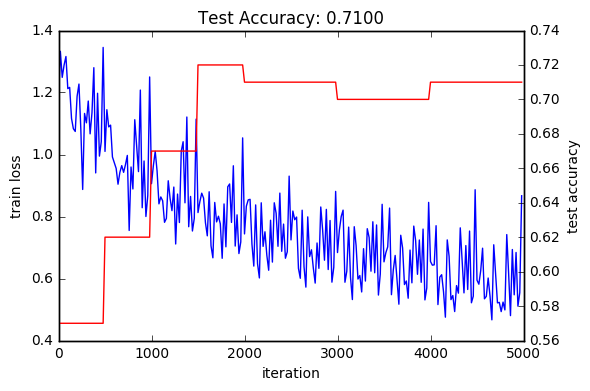

In [10]:
interval = 20 # 采样间隔（便于画图显示）
train_loss_reduct = train_loss[0:niter:interval]
test_accuracy_reduct = test_accuracy[0:niter:interval]
iter_reduct = range(niter)[0:niter:interval]

## 结果显示
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(iter_reduct,train_loss_reduct,'b')
ax2.plot(iter_reduct,test_accuracy_reduct, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.4f}'.format(test_accuracy[-1]))